# Google Stock Price Historical Analysis

## Import the Necessary Libraries

In [157]:
#NumPy for numerical computations
import numpy as np

#Pandas for data manipulation and analysis
import pandas as pd

#Seaborn for statistical data visualization
import seaborn as sns

#Matplotlib for basic plotting
import matplotlib.pyplot as plt

#Import warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

## Import the Google Stock Price dataset

In [158]:
#Read the CSV file that contains the Google Stock Price data
data = pd.read_csv('datasets/google_stock_price.csv')

## Check for NULL values

In [159]:
#Search for null values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Describe the dataset

In [160]:
#Describe the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4842 entries, 0 to 4841
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4842 non-null   object 
 1   Open       4842 non-null   float64
 2   High       4842 non-null   float64
 3   Low        4842 non-null   float64
 4   Close      4842 non-null   float64
 5   Adj Close  4842 non-null   float64
 6   Volume     4842 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 264.9+ KB


In [161]:
#Change the Date column from Object to Date type
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4842 entries, 0 to 4841
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4842 non-null   datetime64[ns]
 1   Open       4842 non-null   float64       
 2   High       4842 non-null   float64       
 3   Low        4842 non-null   float64       
 4   Close      4842 non-null   float64       
 5   Adj Close  4842 non-null   float64       
 6   Volume     4842 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 264.9 KB


## Visualize the Data

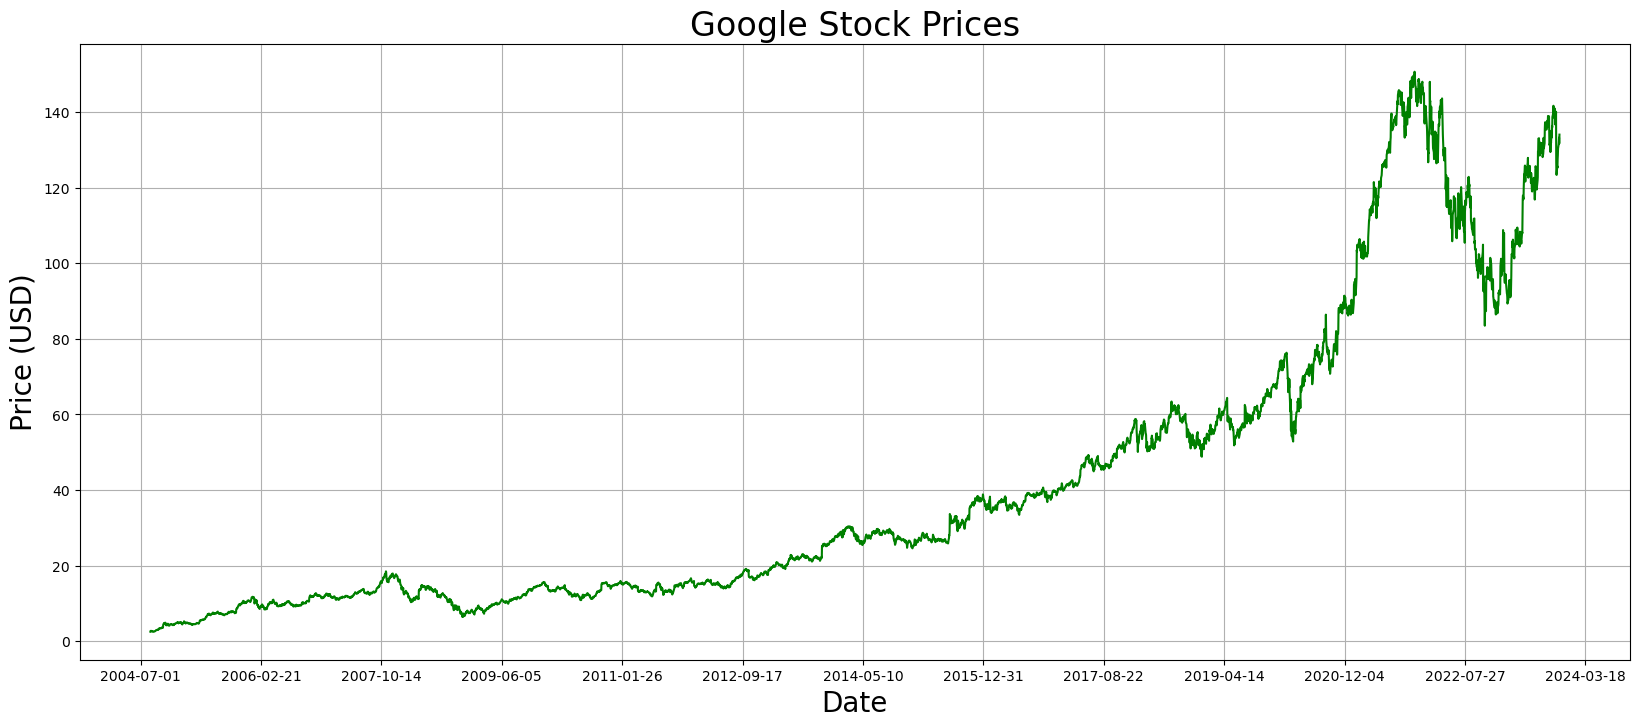

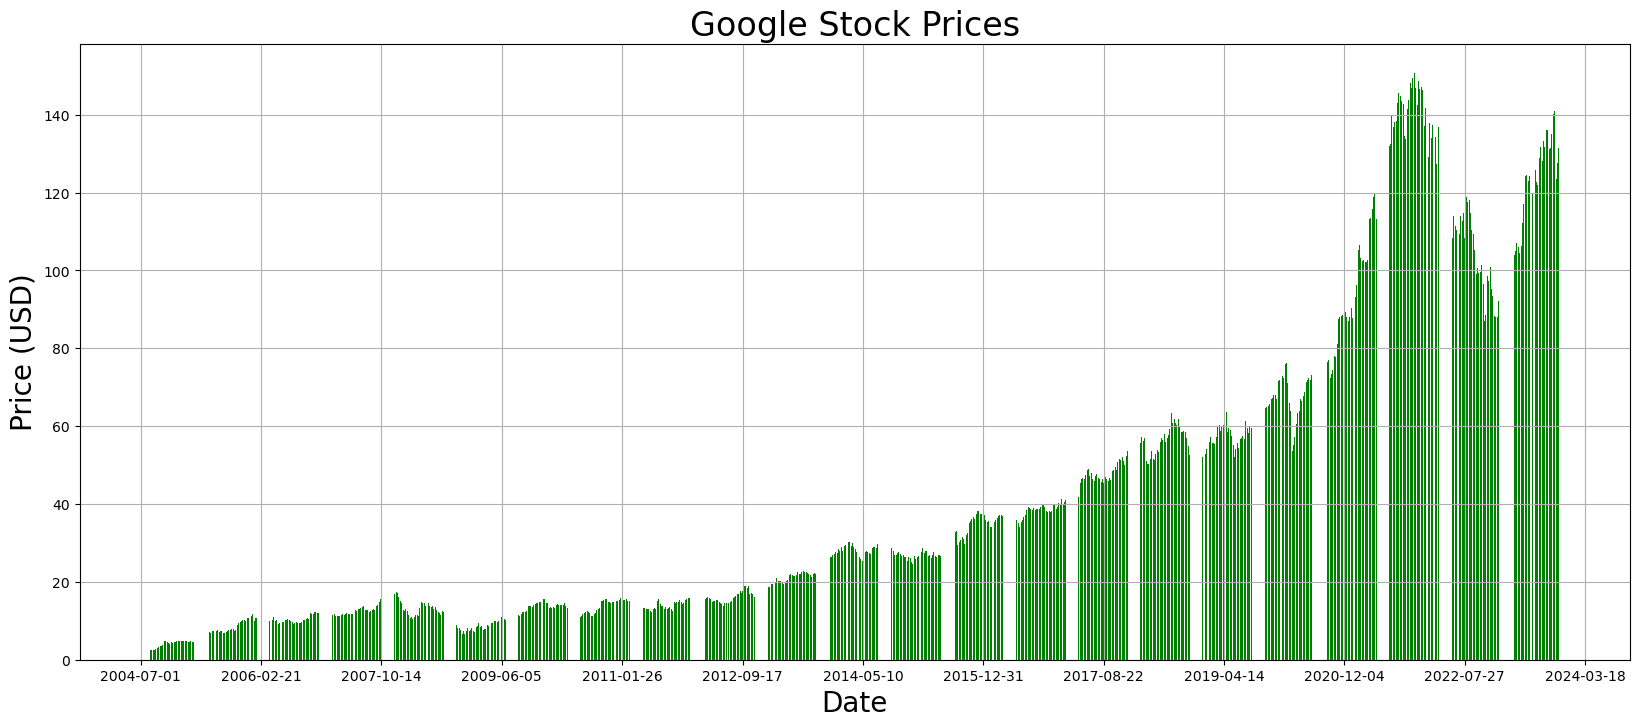

In [162]:
#Plot the historical Google Stock Prices

#Line Plot
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'], data['Close'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Price (USD)', fontsize=20)
plt.title('Google Stock Prices', fontsize=24)
plt.grid()
plt.show()

#Bar Plot
fig2, ax = plt.subplots(figsize=(20,8))
ax.bar(data['Date'], data['Close'], color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Price (USD)', fontsize=20)
plt.title('Google Stock Prices', fontsize=24)
plt.grid()
plt.show()

## Visualize the Data Volume

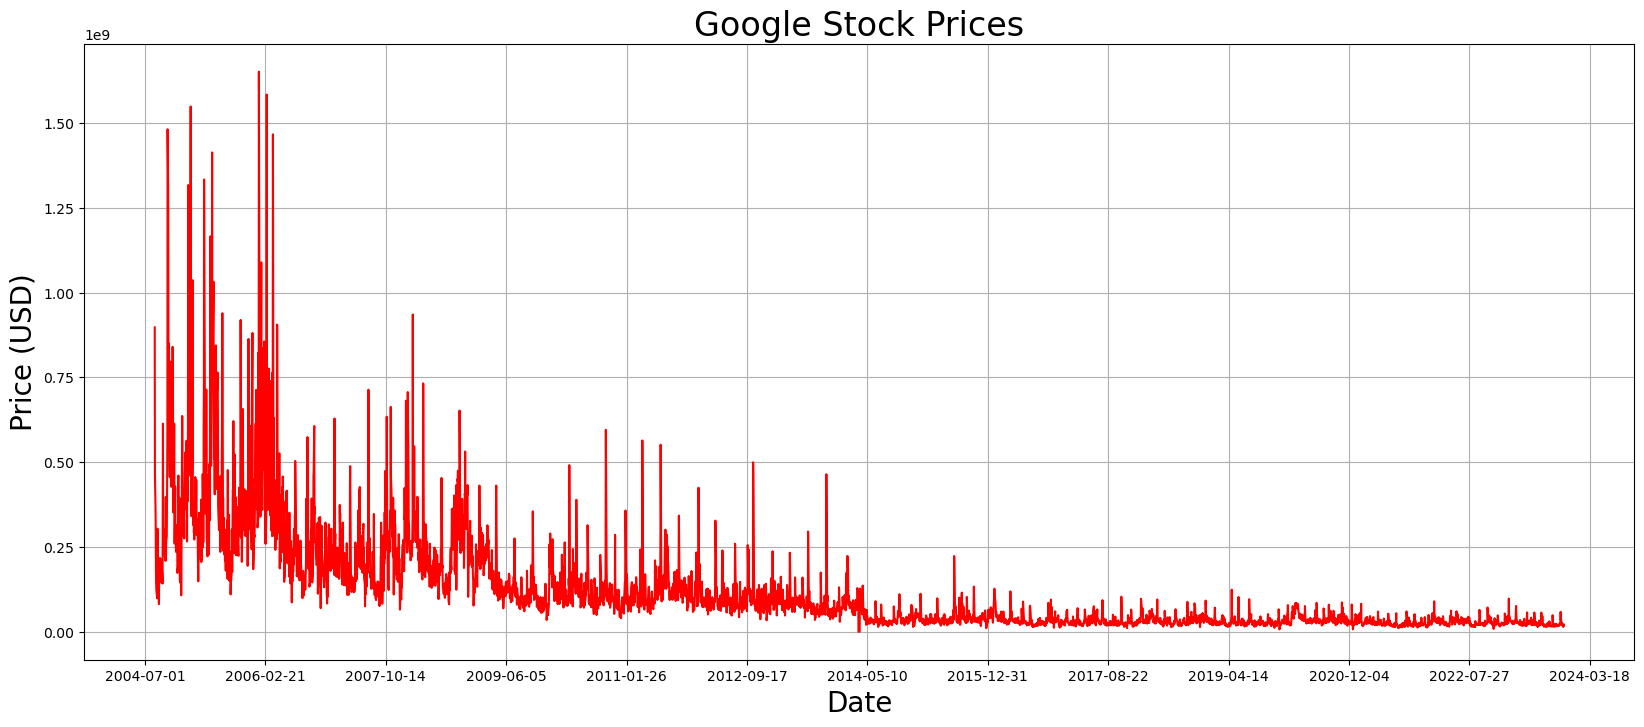

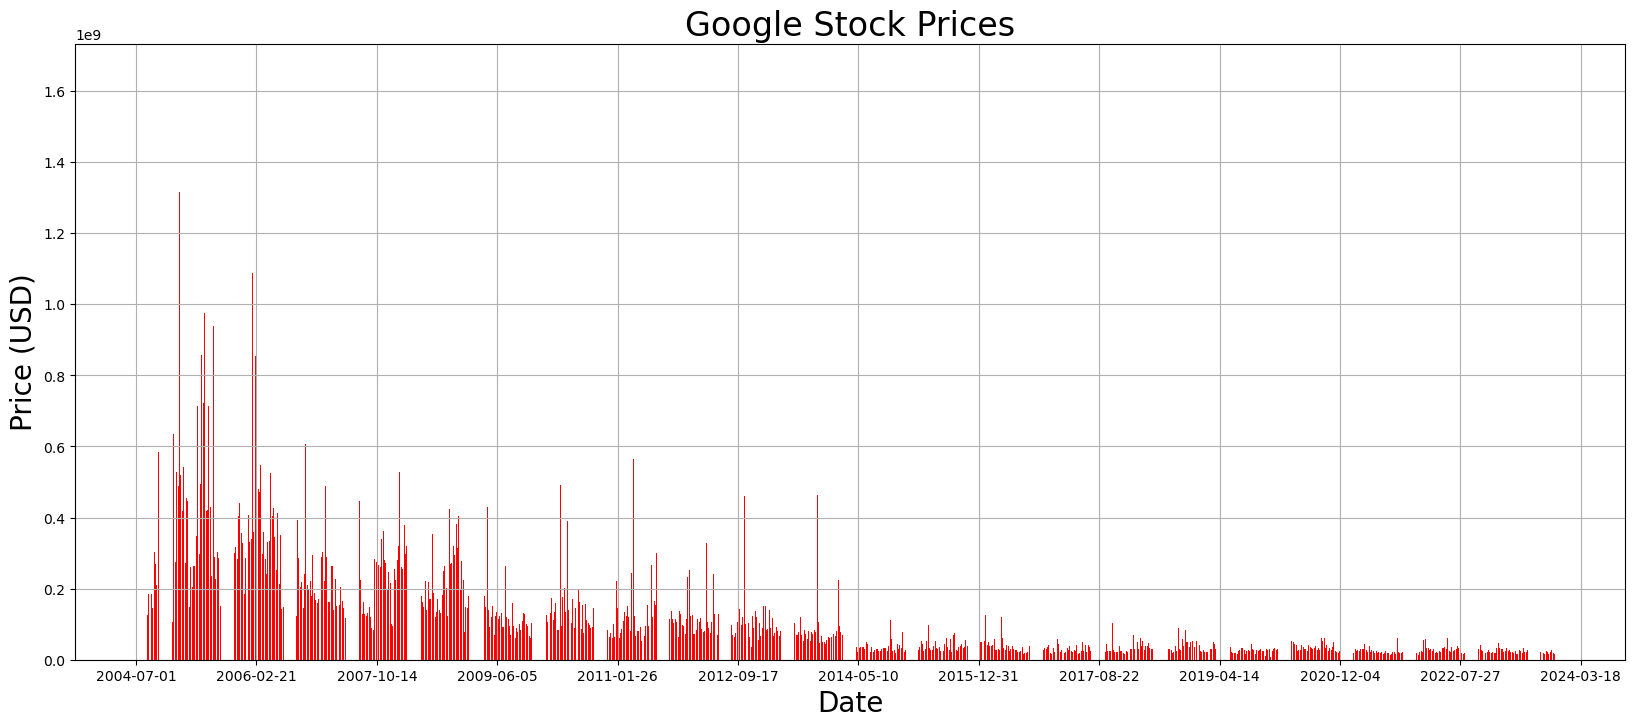

In [163]:
#Plot the valume trends of the Google Stock Prices

#Line Plot
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'], data['Volume'], color='red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Price (USD)', fontsize=20)
plt.title('Google Stock Prices', fontsize=24)
plt.grid()
plt.show()

#Bar Plot
fig2, ax = plt.subplots(figsize=(20,8))
ax.bar(data['Date'], data['Volume'], color='red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Price (USD)', fontsize=20)
plt.title('Google Stock Prices', fontsize=24)
plt.grid()
plt.show()

## Visualize Market Capitalization

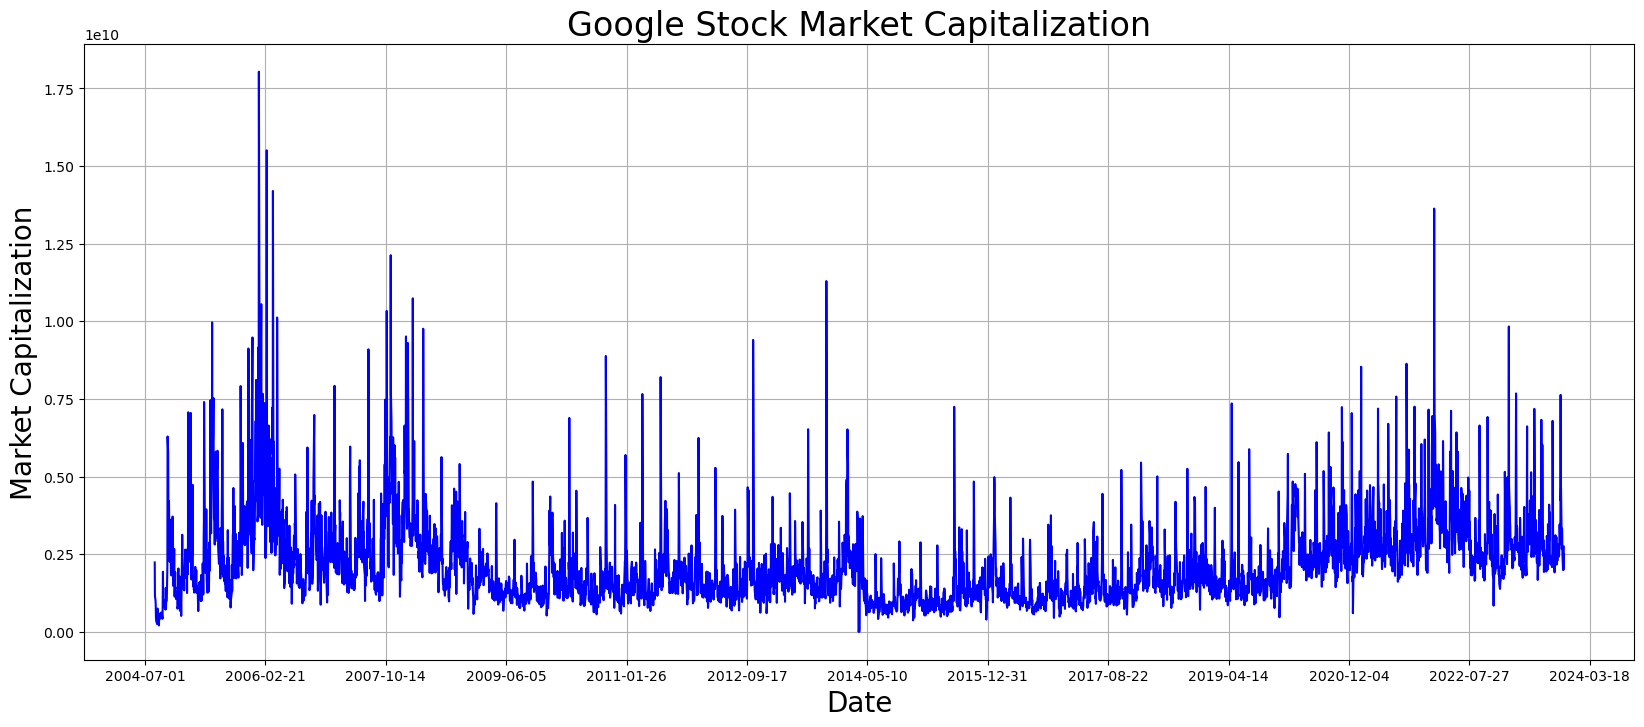

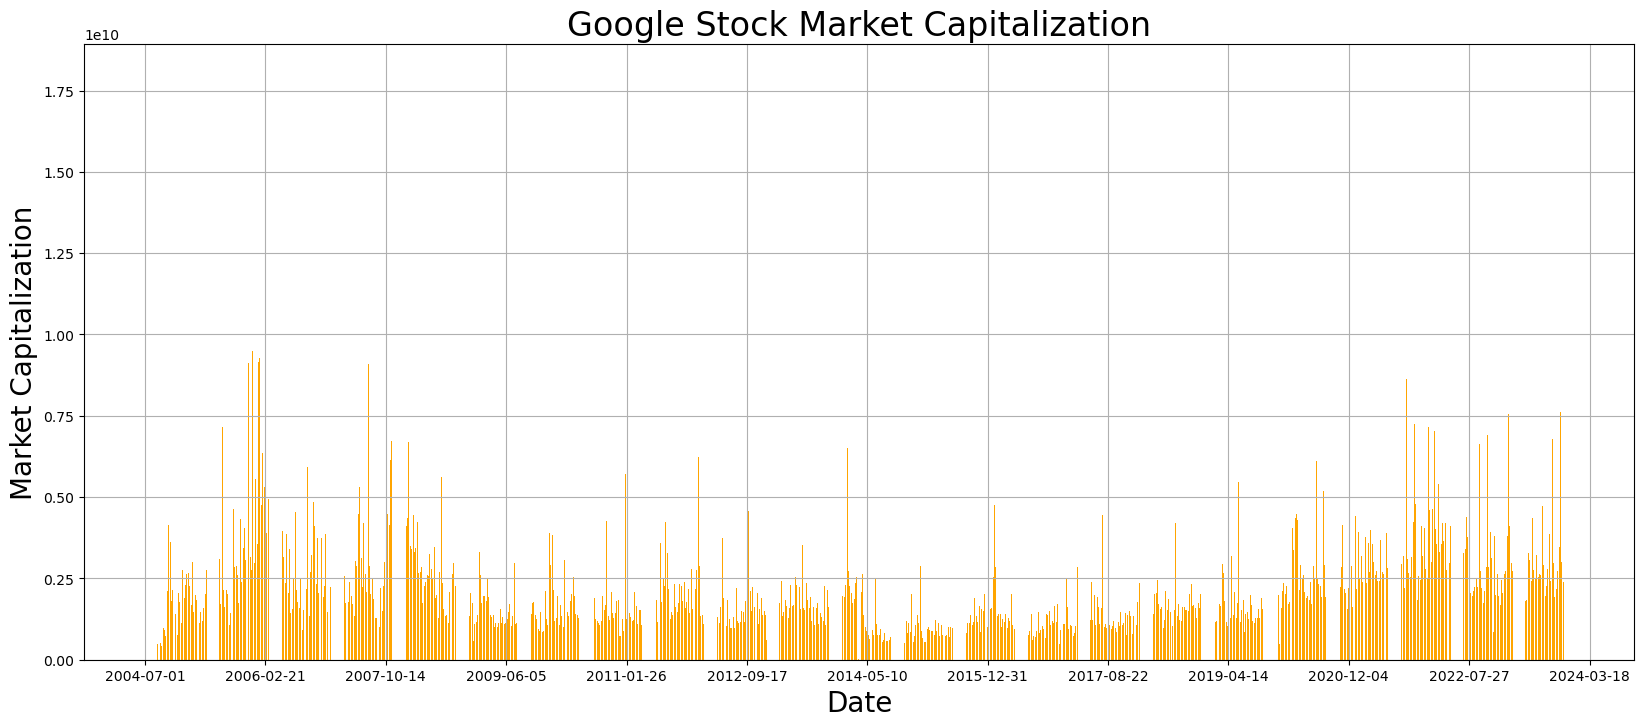

In [164]:
#Calculate the Market Capitalization
data['Market Cap'] = data['Open'] * data['Volume']

#Line Plot
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'], data['Market Cap'], color='blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Market Capitalization', fontsize=20)
plt.title('Google Stock Market Capitalization', fontsize=24)
plt.grid()
plt.show()

#Bar Chart
fig2, ax = plt.subplots(figsize=(20,8))
ax.bar(data['Date'], data['Market Cap'], color='orange')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Market Capitalization', fontsize=20)
plt.title('Google Stock Market Capitalization', fontsize=24)
plt.grid()
plt.show()

## Voltality

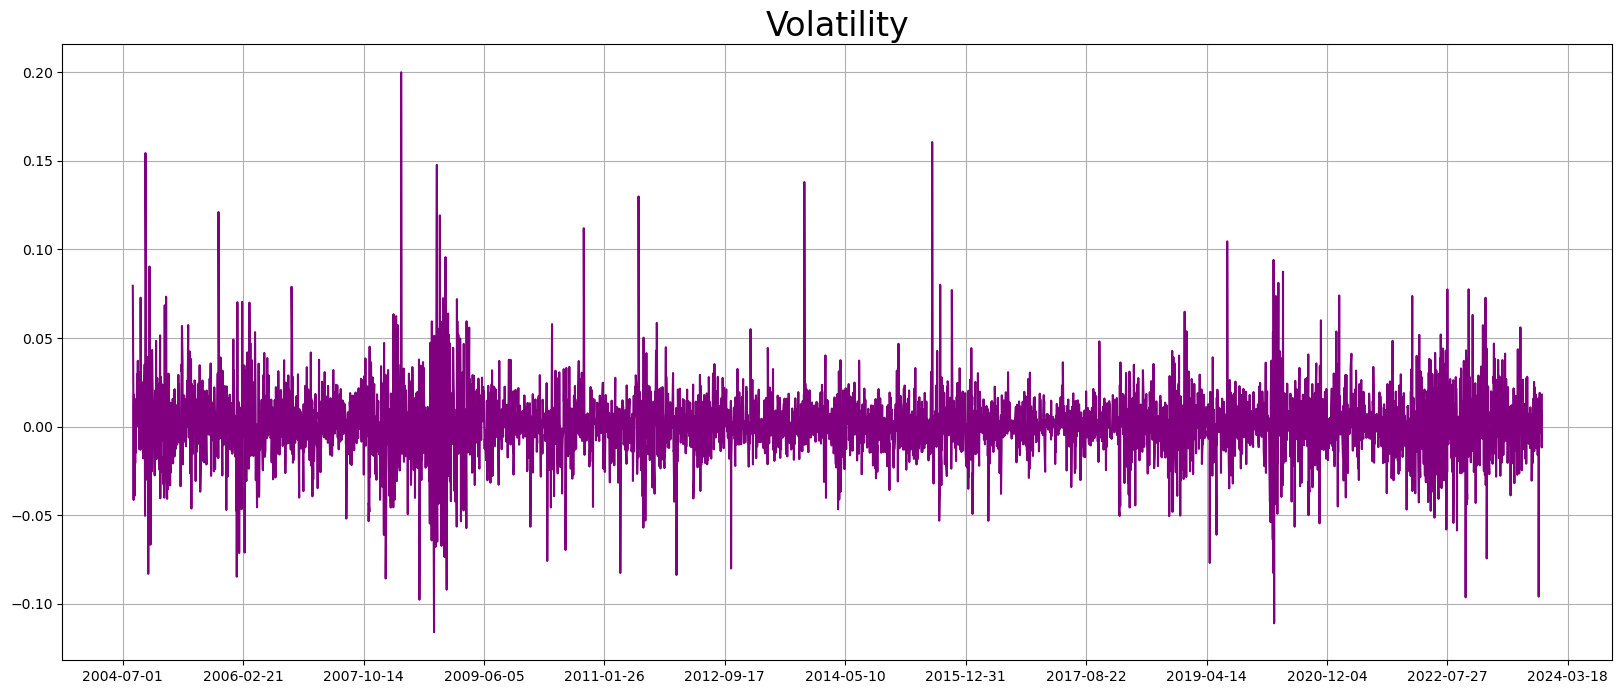

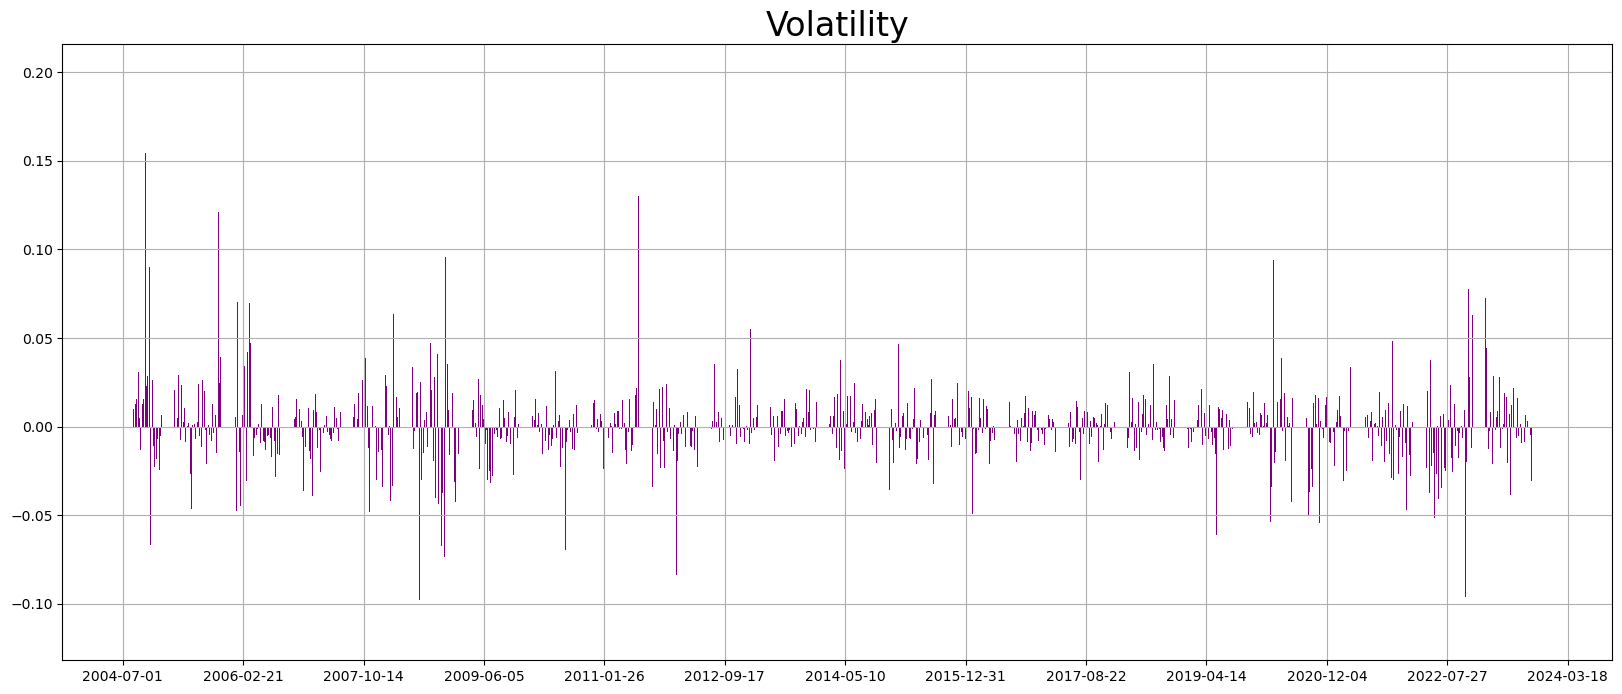

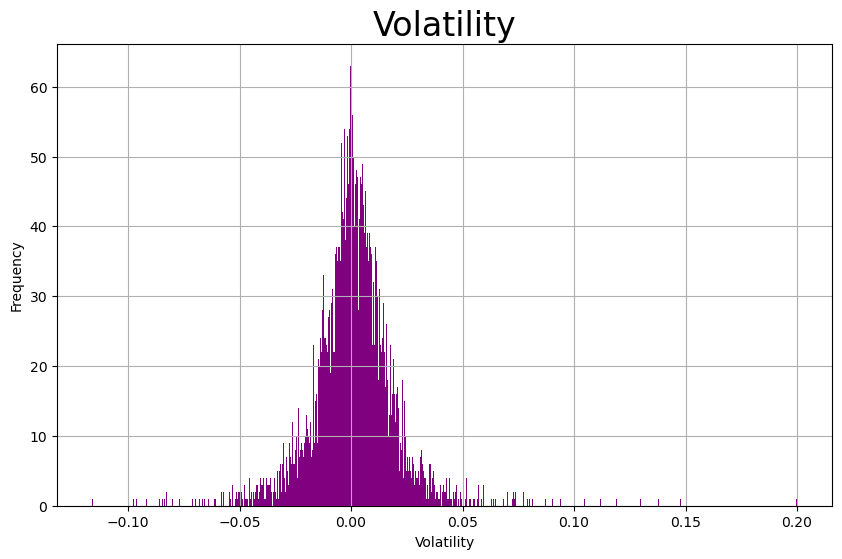

In [165]:
#Calculate the daily volatility
data['Volatility'] = (data['Close'] / data['Close'].shift(1)) - 1

#Line Plot
fig, ax = plt.subplots(figsize = (20,8))
ax.plot(data['Date'], data['Volatility'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility', fontsize=24)
plt.grid()
plt.show()

#Bar Plot
fig2, ax = plt.subplots(figsize=(20,8))
ax.bar(data['Date'], data['Volatility'], color='purple')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.title('Volatility', fontsize=24)
plt.grid()
plt.show()

#Histogram
plt.figure(figsize=(10,6))
data['Volatility'].hist(bins=1000, color='purple')
plt.title('Volatility', fontsize=24)
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.show()

## Cumulative Return

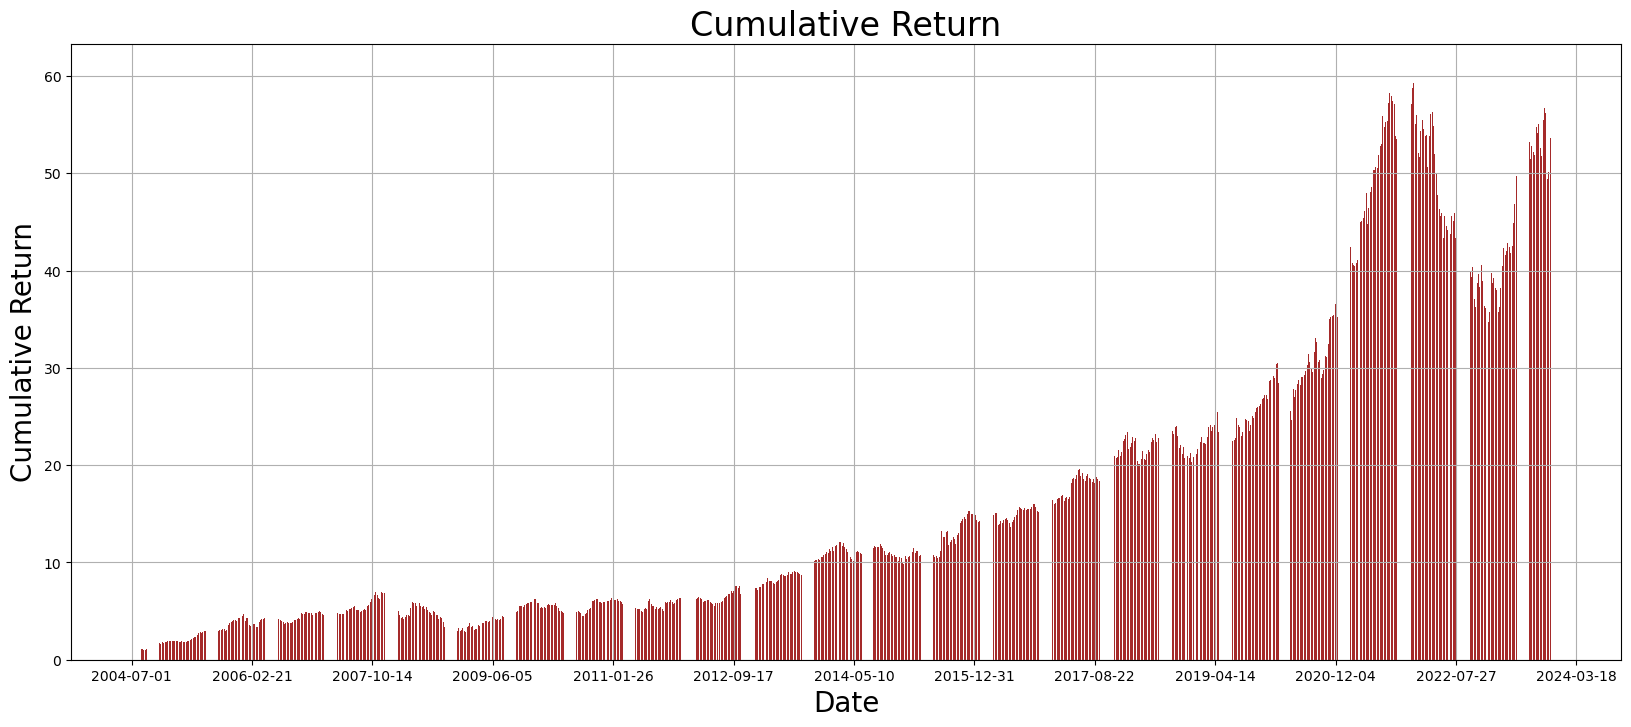

In [166]:
#Calculate Cumulative Return
data['Cumulative Return'] = (1 + data['Volatility']).cumprod()

#Bar Chart
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(data['Date'], data['Cumulative Return'], color='brown')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Cumulative Return', fontsize=20)
plt.title('Cumulative Return', fontsize=24)
plt.grid()
plt.show()

## Calendar Effect

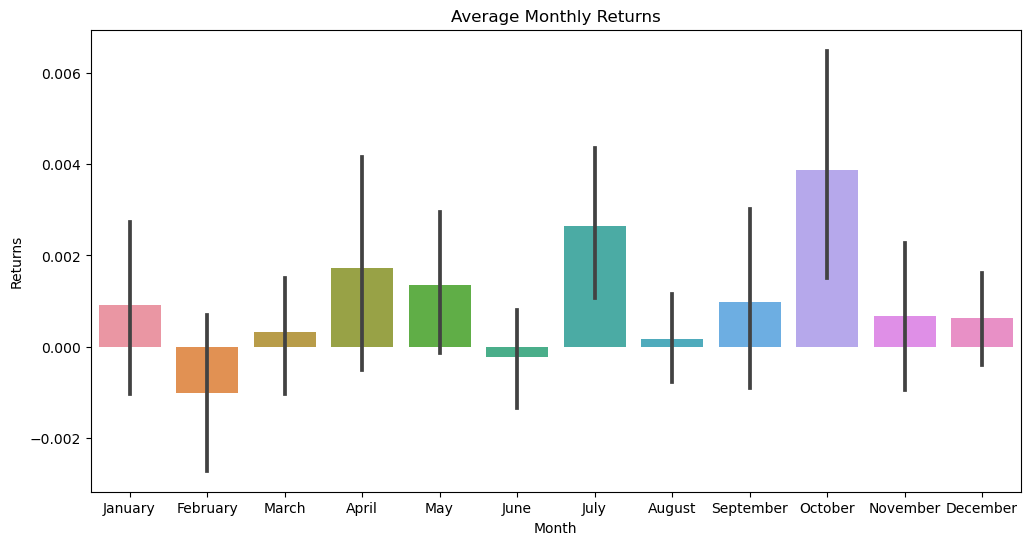

In [167]:
#Calculate Daily Returns
data['Return'] = data['Close'].pct_change()

#Extract the month and year from the Date column
data['Month'] = data['Date'].dt.month_name()
data['Year'] = data['Date'].dt.year

#Group data by the month and year, then calculate the return
monthly_returns = data.groupby(['Month', 'Year'])['Return'].mean().reset_index()

#Define the desired order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#Sort the data by month order
monthly_returns['Month'] = pd.Categorical(monthly_returns['Month'], categories=month_order, ordered=True)
monthly_returns = monthly_returns.sort_values('Month')

#Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_returns, x='Month', y='Return')
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Returns')
plt.show()

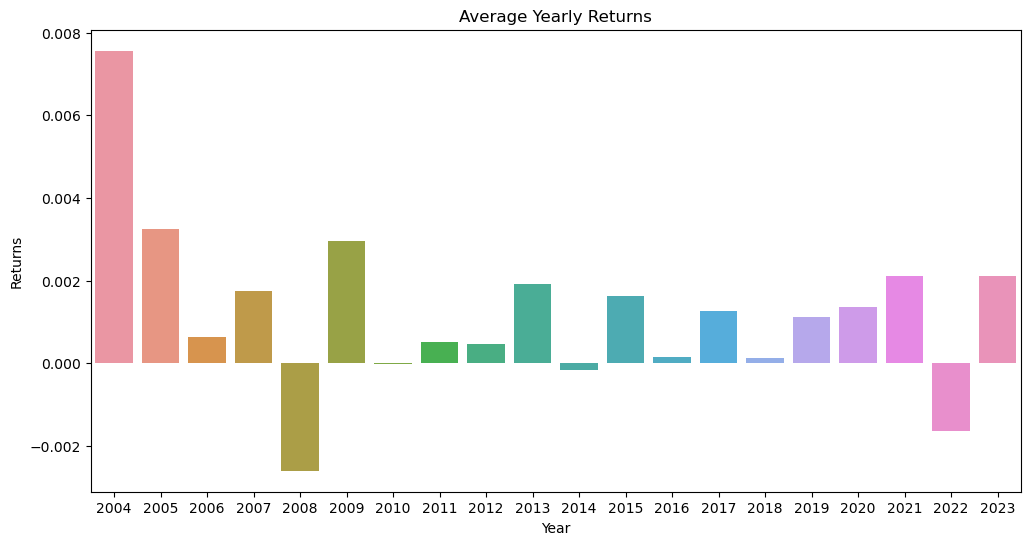

In [168]:
#Group the data by year and calculate the average return
yearly_returns = data.groupby(['Year'])['Return'].mean().reset_index()

#Sort the data
yearly_returns= yearly_returns.sort_values('Year')

#Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(data=yearly_returns, x='Year', y='Return')
plt.title('Average Yearly Returns')
plt.xlabel('Year')
plt.ylabel('Returns')
plt.show()

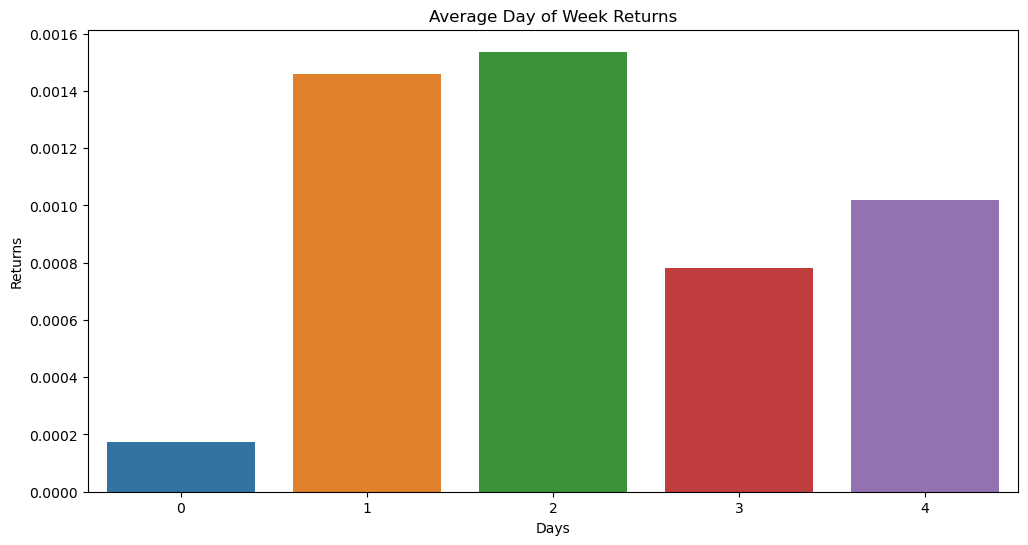

In [169]:
#Extract the day of the week from the date column
data['Day'] = data['Date'].dt.weekday

#Group data by the day of the week and calculate the average return
daily_returns = data.groupby(['Day'])['Return'].mean().reset_index()

#Sort the data by day of the week
daily_returns = daily_returns.sort_values('Day')

#Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(data=daily_returns, x='Day', y='Return')
plt.title('Average Day of Week Returns')
plt.xlabel('Days')
plt.ylabel('Returns')
plt.show()

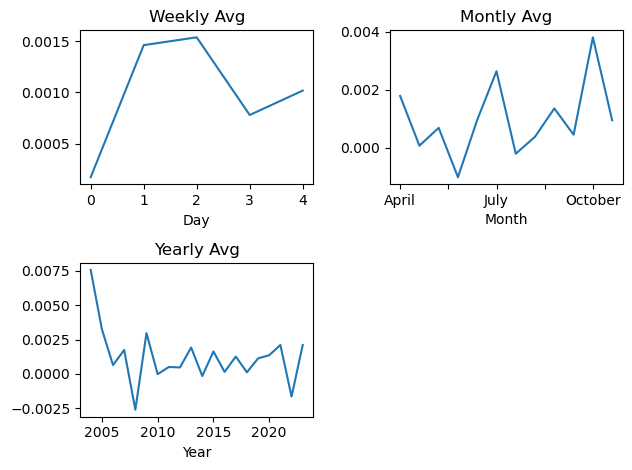

In [170]:
plt.subplot(221)
plt.title('Weekly Avg')
data.groupby(['Day'])['Return'].mean().plot()

plt.subplot(222)
plt.title('Montly Avg')
data.groupby(['Month'])['Return'].mean().plot()

plt.subplot(223)
plt.title('Yearly Avg')
data.groupby(['Year'])['Return'].mean().plot()

plt.tight_layout()
plt.show()

## Technical Analysis

## Moving Average

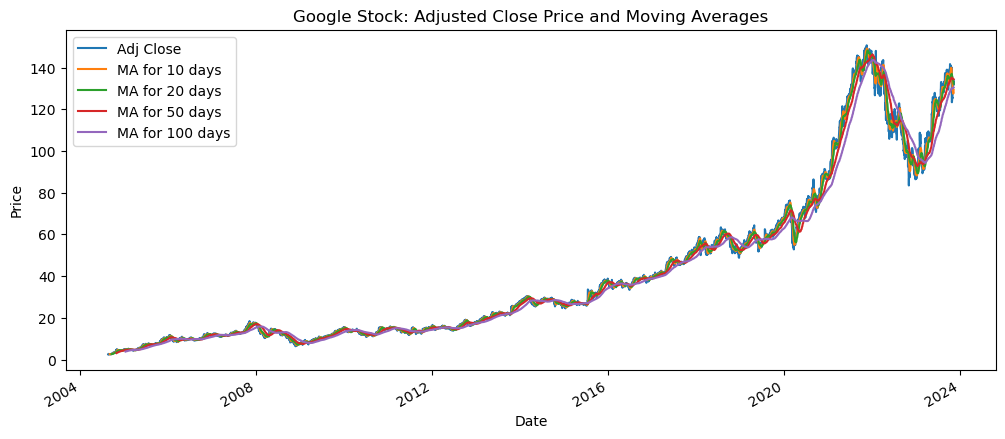

,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,Volatility,Cumulative Return,Return,Month,Year,Day,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2.235190e+09,NaN,NaN,NaN,August,2004,3,NaN,NaN,NaN,NaN
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,1.154403e+09,0.079430,1.079430,0.079430,August,2004,4,NaN,NaN,NaN,NaN
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,1.011945e+09,0.010064,1.090293,0.010064,August,2004,0,NaN,NaN,NaN,NaN
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,8.489058e+08,-0.041408,1.045146,-0.041408,August,2004,1,NaN,NaN,NaN,NaN
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,4.827005e+08,0.010775,1.056408,0.010775,August,2004,2,NaN,NaN,NaN,NaN


In [171]:
#Calculate moving averages for different windows
data['MA for 10 days'] = data['Open'].rolling(10).mean()
data['MA for 20 days'] = data['Open'].rolling(20).mean()
data['MA for 50 days'] = data['Open'].rolling(50).mean()
data['MA for 100 days'] = data['Open'].rolling(100).mean()

#Truncate the data if needed
truncated_data = data.truncate()
truncated_data.set_index('Date', inplace=True)

#Plot adjusted close price and moving averages
truncated_data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(subplots=False, figsize=(12,5))

#Set the title and axis labels
plt.title('Google Stock: Adjusted Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
data.head()

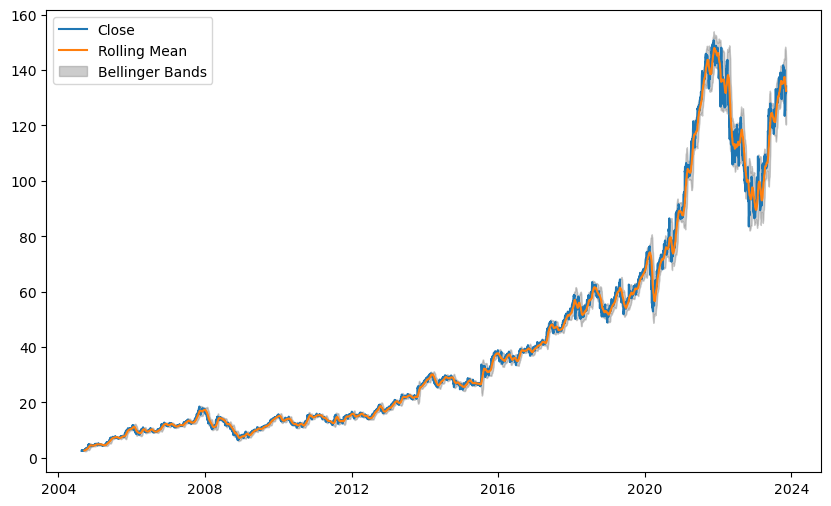

In [172]:
#Plot the Bollinger Band
data.set_index('Date', inplace=True)
rolling_mean = data['Close'].rolling(window=20).mean()
rolling_std = data['Close'].rolling(window=20).std()
upper_band = rolling_mean + (rolling_std * 2)
lower_band = rolling_mean - (rolling_std*2)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data.index, data['Close'], label='Close')
ax.plot(rolling_mean.index, rolling_mean, label='Rolling Mean')
ax.fill_between(rolling_mean.index, upper_band, lower_band, alpha=0.4, color='gray', label='Bellinger Bands')
ax.legend()
plt.show()

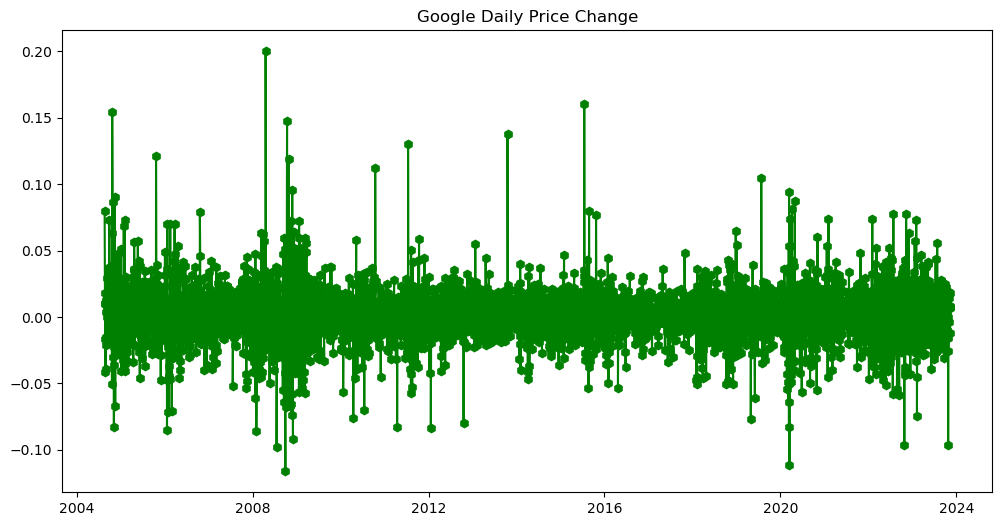

In [173]:
#Plot Daily Price Change of Google Stock
plt.figure(figsize=(12,6))
plt.plot(data['Return'], marker='h', color='g')
plt.title('Google Daily Price Change')
plt.show()

## Price Prediction

## Prophet

In [174]:
#!pip install Prophet

In [175]:
#Use the Date and Close columns for the stock_data DataFrame
data.reset_index(inplace=True)
df = pd.DataFrame(data)
#df.set_index('Date', inplace=True)
df = df[['Date', 'Close']]
#df.set_index('Date', inplace=True)

#Rename the columns for compatibility with Prophet
df = df.rename(columns={'Date':'ds', 'Close':'y'})

from prophet import Prophet

m = Prophet()
#Fit the model with historical stock data
m.fit(df) #Model is trained with all of the historical data

#Generate the predictions for future dates using the fitted model
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

14:54:09 - cmdstanpy - INFO - Chain [1] start processing
14:54:09 - cmdstanpy - INFO - Chain [1] done processing


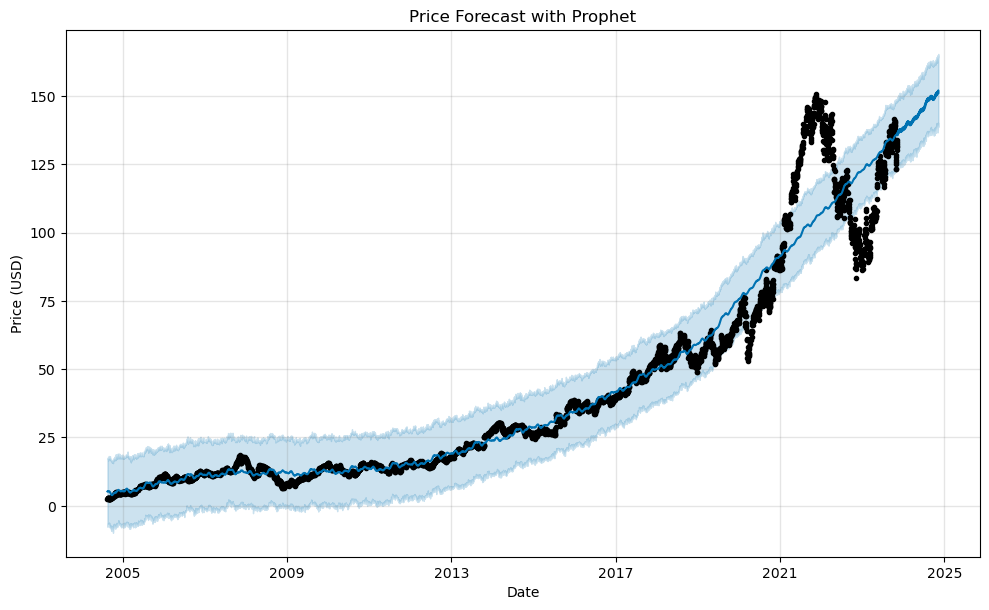

In [176]:
#Visualize the Predicted Values
fig2 = m.plot(forecast)
plt.title('Price Forecast with Prophet')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

## ARIMA

In [177]:
#Set the Test and Train size for the prediction model
data.set_index('Date', inplace=True)
length = int(len(data['Close']) * 0.90)
print('Length:', length)
print('Data length:', len(data))
train = data.iloc[:length]
print('training shape', train.shape)
test = data.iloc[length:]
print('testing shape', test.shape)

Length: 4357
Data length: 4842
training shape (4357, 17)
testing shape (485, 17)


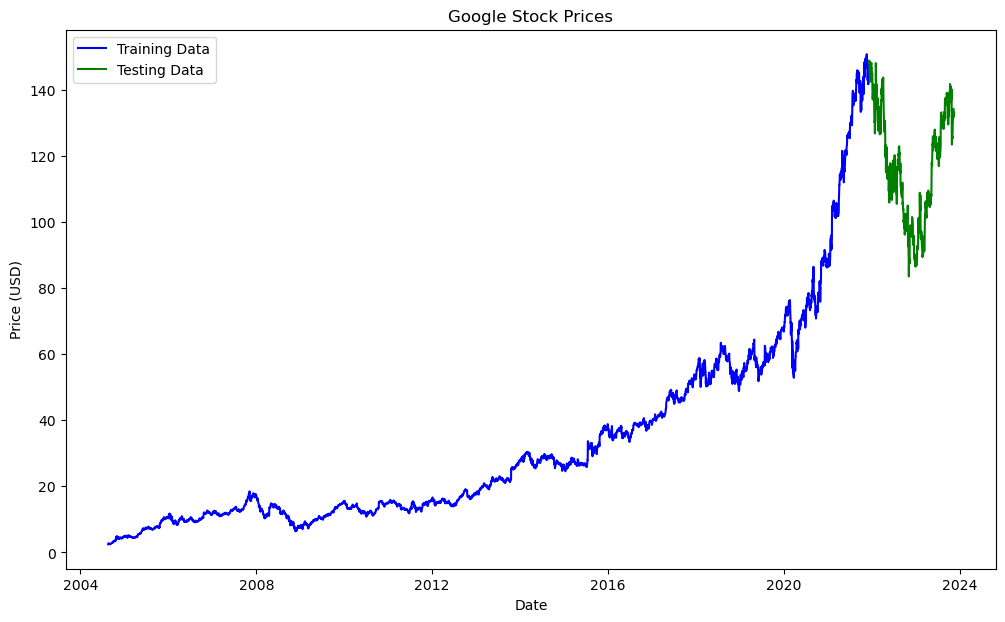

In [178]:
plt.figure(figsize=(12,7))
plt.title('Google Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.plot(train['Close'], 'blue', label='Training Data')
plt.plot(test['Close'], 'green', label='Testing Data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9443.937, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9420.847, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9421.847, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9451.437, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9420.918, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9418.275, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9420.253, Time=1.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9420.249, Time=1.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9422.008, Time=0.41 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9418.738, Time=2.19 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9426.806, Time=0.25 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 6.778 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4

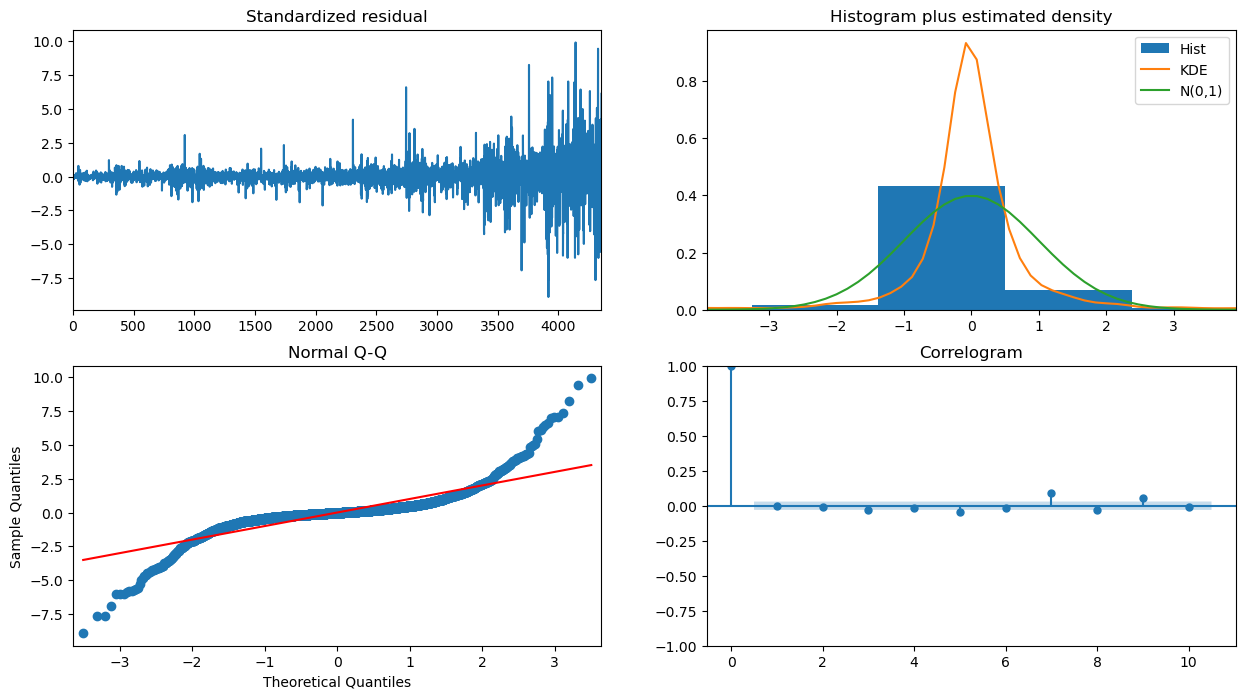

In [179]:
from pmdarima.arima import auto_arima

#Make the prediction model
model_autoarima = auto_arima(train['Close'], start_p=0, start_q=0,
                            test = 'adf', #use adftest to find optimal d value
                            max_p = 3, max_q = 3, #maximum p and q values
                            m = 1, #frequency of series
                            d = None, #let model determine d value
                            seasonal = False, #we will specify no seasonality
                            start_P = 0,
                            D = 0,
                            trace = True,
                            error_action = 'ignore',
                            supress_Warnings = True,
                            stepwise = True
                            )
print(model_autoarima.summary())
model_autoarima.plot_diagnostics(figsize=(15,8))
plt.show()

In [180]:
#!pip install statsmodels

In [181]:
import statsmodels.api as sm
pred_start = test.index[0] #start date
pred_end = test.index[-1] #end data
model = sm.tsa.statespace.SARIMAX(data['Close'],order=(1,1,1)) #(1,1,1) was identified as the best order
model_fit = model.fit()
pred = model_fit.predict(start = pred_start, end = pred_end)
pred

Date
2021-12-08    147.921438
2021-12-09    148.598492
2021-12-10    148.023531
2021-12-13    148.584791
2021-12-14    146.696608
                 ...    
2023-11-06    130.365817
2023-11-07    131.408621
2023-11-08    132.331467
2023-11-09    133.171479
2023-11-10    131.669535
Name: predicted_mean, Length: 485, dtype: float64

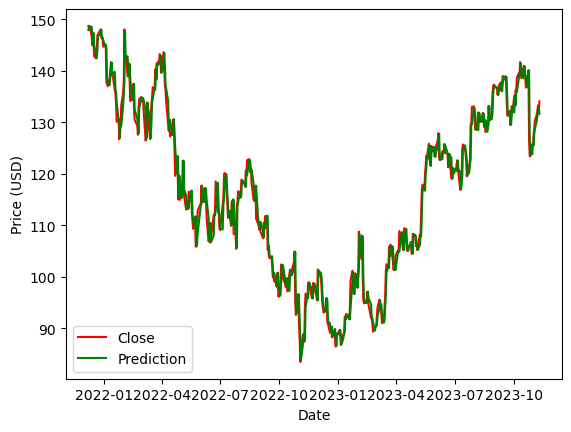

In [182]:
df_sarimax = pd.DataFrame(test)
df_sarimax['prediction'] = pd.Series(pred, index=test.index)
plt.plot(df_sarimax['Close'], 'red', label='Close')
plt.plot(df_sarimax['prediction'], 'green', label='Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

## LTSM

In [183]:
#Use the same dataframe we have been using
data

,Open,High,Low,Close,Adj Close,Volume,Market Cap,Volatility,Cumulative Return,Return,Month,Year,Day,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2.235190e+09,NaN,NaN,NaN,August,2004,3,NaN,NaN,NaN,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,1.154403e+09,0.079430,1.079430,0.079430,August,2004,4,NaN,NaN,NaN,NaN
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,1.011945e+09,0.010064,1.090293,0.010064,August,2004,0,NaN,NaN,NaN,NaN
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,8.489058e+08,-0.041408,1.045146,-0.041408,August,2004,1,NaN,NaN,NaN,NaN
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,4.827005e+08,0.010775,1.056408,0.010775,August,2004,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06,130.220001,131.559998,129.929993,131.449997,131.449997,15360400,2.000231e+09,0.008284,52.598238,0.008284,November,2023,0,128.237000,133.983499,134.63604,130.18153
2023-11-07,131.979996,133.279999,131.139999,132.399994,132.399994,19223800,2.537157e+09,0.007227,52.978368,0.007227,November,2023,1,127.518999,133.606999,134.63404,130.26253
2023-11-08,132.360001,133.539993,132.160004,133.259995,133.259995,15093600,1.997789e+09,0.006495,53.322488,0.006495,November,2023,2,127.777998,133.232499,134.62128,130.31913


In [184]:
import math
data = data.filter(['Close'])
dataset = data.values #convert the dataframe to a NumPy array
training_data_len = math.ceil(len(dataset)*.8) #determine the numbers of rows to train the model on 80%
training_data_len

3874

In [185]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[5.54601395e-05],
       [1.39474256e-03],
       [1.57790515e-03],
       ...,
       [8.82274792e-01],
       [8.71682346e-01],
       [8.87672264e-01]])

In [186]:
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

#Convert the x_train and y_train to NumPy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([5.54601395e-05, 1.39474256e-03, 1.57790515e-03, 8.16681841e-04,
       1.00656502e-03, 1.32752381e-03, 1.03177125e-03, 3.36085743e-04,
       3.96579086e-04, 4.03331846e-05, 2.52062297e-04, 0.00000000e+00,
       2.63827349e-04, 3.84818860e-04, 3.86498202e-04, 8.93979873e-04,
       1.25862571e-03, 1.92911142e-03, 2.01480938e-03, 2.34584744e-03,
       2.93735417e-03, 3.25158754e-03, 2.99616656e-03, 3.08690416e-03,
       3.49692925e-03, 3.33056652e-03, 3.06674561e-03, 4.51189259e-03,
       5.22102410e-03, 4.97232210e-03, 5.47308479e-03, 5.88982081e-03,
       6.44603560e-03, 6.22926685e-03, 6.52669393e-03, 6.33849170e-03,
       5.92343341e-03, 6.28303960e-03, 6.87117960e-03, 7.05602153e-03,
       7.41058809e-03, 8.25919514e-03, 8.05418662e-03, 6.80228150e-03,
       8.29616160e-03, 1.21695001e-02, 1.46850625e-02, 1.37440385e-02,
       1.44447685e-02, 1.56765022e-02, 1.52295171e-02, 1.61352524e-02,
       1.59403296e-02, 1.54025956e-02, 1.42313536e-02, 1.16519311e-02,
     

In [187]:
#!pip install tensorflow

In [193]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
120/120 [==============================] - 6s 31ms/step - loss: 0.0012
Epoch 2/100
120/120 [==============================] - 4s 31ms/step - loss: 2.0192e-04
Epoch 3/100
120/120 [==============================] - 4s 32ms/step - loss: 2.0254e-04
Epoch 4/100
120/120 [==============================] - 4s 32ms/step - loss: 1.4563e-04
Epoch 5/100
120/120 [==============================] - 4s 35ms/step - loss: 1.4221e-04
Epoch 6/100
120/120 [==============================] - 4s 34ms/step - loss: 1.4128e-04
Epoch 7/100
120/120 [==============================] - 4s 36ms/step - loss: 1.2520e-04
Epoch 8/100
120/120 [==============================] - 4s 34ms/step - loss: 1.3079e-04
Epoch 9/100
120/120 [==============================] - 4s 35ms/step - loss: 1.1621e-04
Epoch 10/100
120/120 [==============================] - 4s 36ms/step - loss: 1.1542e-04
Epoch 11/100
120/120 [==============================] - 4s 37ms/step - loss: 1.0579e-04
Epoch 12/100
120/120 [=======================

In [194]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

test_data = scaled_data[training_data_len - 60:, :]
#Create X and Y Test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
#Convert data to NumPy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Get predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

#Get Root Mean Squared Error RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print('RMSE: {:.4f}'.format(rmse))
print('MAE: {:.4f}'.format(mae))
print('mse: {:.4f}'.format(mse))
print('R2 Score: {:.4f}'.format(r2))

31/31 [==============================] - 1s 11ms/step
RMSE: 6.6732
MAE: 5.9655
mse: 44.5322
R2 Score: 0.9299


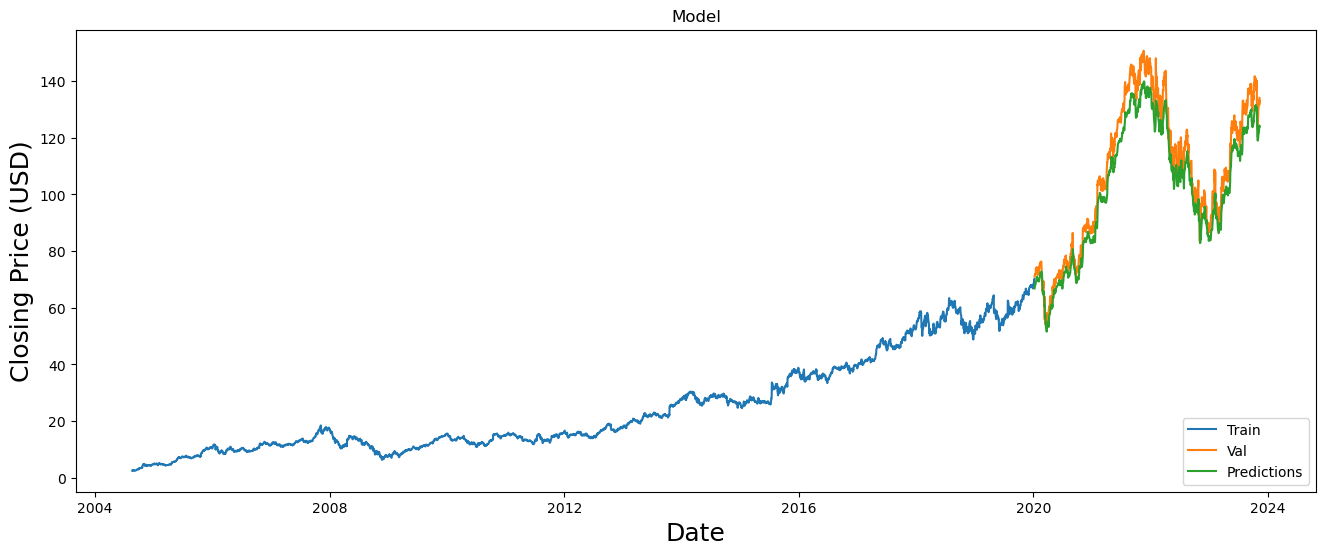

In [195]:
train = data[:training_data_len]
val = data[training_data_len:]
val['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()